# A Simple Artificial Neural Network (ANN)

## Import Dataset

In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocess the data

In [2]:
# x- Input data
x = data.drop("Outcome", axis=1)
# y- output data
y = data["Outcome"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Add Layers 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Input_dim = 8 for the 8 features of a single sample.
# First dense layer has 8 input nodes and 16 output nodes

model.add(Dense(16, name= 'First_Hidden_layer', input_dim=8, activation="relu")) 

# Second dense has 16 input nodes and 8 output nodes
model.add(Dense(8,name= 'Second_Hidden_layer', activation="relu"))

# Third dense layer has 8 input layer and 1 output node. This is the final output layer to show the result for binary classification. 
model.add(Dense(1,name= 'Output_layer', activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 16)                144       
                                                                 
 Second_Hidden_layer (Dense)  (None, 8)                136       
                                                                 
 Output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


## Compile the model


In [4]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Fit Model

In [5]:
history = model.fit(x,y,validation_split=0.20,epochs=35, batch_size=10)

Epoch 1/35
62/62 [==============================] - 1s 3ms/step - loss: 0.6848 - accuracy: 0.5635 - val_loss: 0.6628 - val_accuracy: 0.6429
Epoch 2/35
62/62 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.6531 - val_loss: 0.6418 - val_accuracy: 0.6429
Epoch 3/35
62/62 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.6531 - val_loss: 0.6304 - val_accuracy: 0.6429
Epoch 4/35
62/62 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6531 - val_loss: 0.6216 - val_accuracy: 0.6429
Epoch 5/35
62/62 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.6580 - val_loss: 0.6127 - val_accuracy: 0.6429
Epoch 6/35
62/62 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6531 - val_loss: 0.6021 - val_accuracy: 0.6429
Epoch 7/35
62/62 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.6612 - val_loss: 0.5937 - val_accuracy: 0.6429
Epoch 8/35
62/62 [==

## Visualizing the Results

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


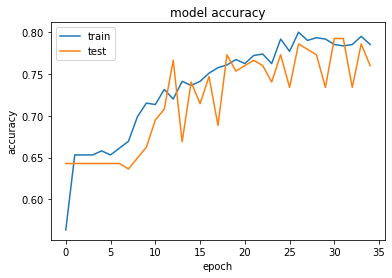

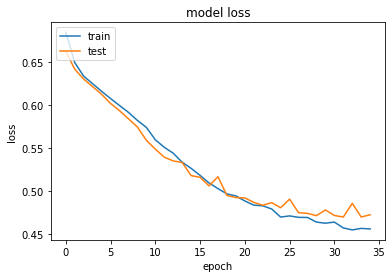

In [6]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluate Model

In [7]:
loss, accuracy = model.evaluate(x, y)
print("Model loss: %.2f"% (loss*100))
print("Model accuracy: %.2f"% (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7852
Model loss: 45.50
Model accuracy: 78.52


## Make Predictions

In [8]:
import numpy as np
predictions = np.round(model.predict(x))

# Display results for first 5 predictions
res = np.column_stack((predictions[0:5], y[0:5]))
print(res)

[[1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


In [9]:
# Display results for last 5 predictions
n = predictions.shape[0]
res = np.column_stack((predictions[n-5:n], y[n-5:n]))
print(res)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]


# Overfitting and Underfitting


## 1. Early Stopping

We mentioned that when a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called early stopping.

Once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimum occured. This ensures that the model won't continue to learn noise and overfit the data.

Training with early stopping also means we're in less danger of stopping the training too early, before the network has finished learning signal. **So besides preventing overfitting from training too long, early stopping can also prevent underfitting from not training long enough. Just set your training epochs to some large number (more than you'll need), and early stopping will take care of the rest.**

In Keras, we include early stopping in our training through a callback. A callback is just a function you want run every so often while the network trains. The early stopping callback will run after every epoch. 

In [10]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
# Input_dim = 8 for the 8 features of a single sample.
# First dense layer has 8 input nodes and 16 output nodes

model1.add(Dense(16, name= 'First_Hidden_layer', input_dim=8, activation="relu")) 

# Second dense has 16 input nodes and 8 output nodes
model1.add(Dense(8,name= 'Second_Hidden_layer', activation="relu"))

# Third dense layer has 8 input layer and 1 output node. This is the final output layer to show the result for binary classification. 
model1.add(Dense(1,name= 'Output_layer', activation="sigmoid"))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 16)                144       
                                                                 
 Second_Hidden_layer (Dense)  (None, 8)                136       
                                                                 
 Output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [22]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Minimum validation loss: 0.45127129554748535


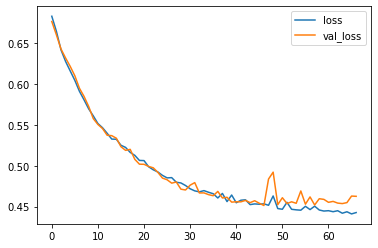

In [23]:
history = model1.fit(
    x, y,
    validation_split=0.20,
    batch_size=10,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


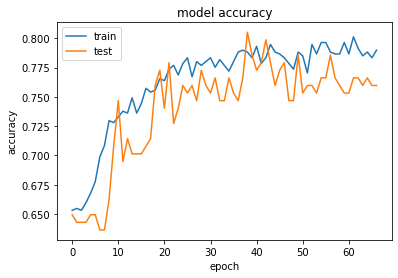

In [25]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
loss, accuracy = model1.evaluate(x, y)
print("Model loss: %.2f"% (loss*100))
print("Model accuracy: %.2f"% (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7878
Model loss: 44.80
Model accuracy: 78.78


## 2. Adding Dropout layers

Dropout Regularization is a computationally cheap way to regularize a deep neural network.

Dropout works by probabilistically removing, or “dropping out,” inputs to a layer, which may be input variables in the data sample or activations from a previous layer. It has the effect of simulating a large number of networks with very different network structure and, in turn, making nodes in the network generally more robust to the inputs.

In [27]:
from tensorflow.keras import layers

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dropout_model = Sequential([
    layers.Dense(16, activation='relu', name= 'First_Hidden_layer', input_dim=8),
    layers.Dropout(0.2),
    layers.Dense(8,name= 'Second_Hidden_layer', activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, name= 'Output_layer', activation='sigmoid')
])
dropout_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 Second_Hidden_layer (Dense)  (None, 8)                136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 Output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [29]:
dropout_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
history = model.fit(x,y,validation_split=0.20,epochs=35, batch_size=10)

Epoch 1/35
62/62 [==============================] - 0s 4ms/step - loss: 0.4846 - accuracy: 0.7655 - val_loss: 0.4842 - val_accuracy: 0.7468
Epoch 2/35
62/62 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7736 - val_loss: 0.4785 - val_accuracy: 0.7468
Epoch 3/35
62/62 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7801 - val_loss: 0.4767 - val_accuracy: 0.7532
Epoch 4/35
62/62 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7736 - val_loss: 0.4764 - val_accuracy: 0.7532
Epoch 5/35
62/62 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7834 - val_loss: 0.4748 - val_accuracy: 0.7532
Epoch 6/35
62/62 [==============================] - 0s 4ms/step - loss: 0.4734 - accuracy: 0.7769 - val_loss: 0.4735 - val_accuracy: 0.7532
Epoch 7/35
62/62 [==============================] - 0s 5ms/step - loss: 0.4706 - accuracy: 0.7818 - val_loss: 0.4742 - val_accuracy: 0.7597
Epoch 8/35
62/62 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


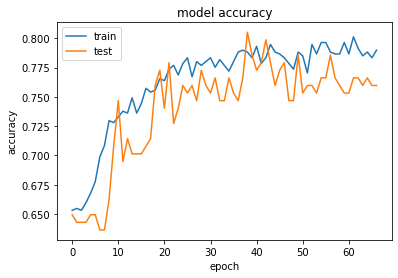

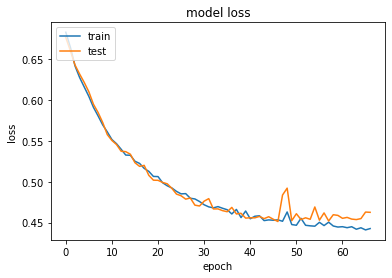

In [30]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
loss, accuracy = model.evaluate(x, y)
print("Model loss: %.2f"% (loss*100))
print("Model accuracy: %.2f"% (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.7852
Model loss: 45.50
Model accuracy: 78.52


# 3. Regularization

A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

**L1 regularization**, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

**L2 regularization**, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

**L2 Regularization Model**

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

l2_model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', name= 'First_Hidden_layer',kernel_regularizer=regularizers.l2(0.001), input_dim=8),
    layers.Dropout(0.2),
    layers.Dense(8,name= 'Second_Hidden_layer',kernel_regularizer=regularizers.l2(0.001) , activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, name= 'Output_layer', activation='sigmoid')
])
l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 16)                144       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 Second_Hidden_layer (Dense)  (None, 8)                136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 Output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [35]:
l2_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
history = l2_model.fit(x,y,validation_split=0.20,epochs=100, batch_size=10 , verbose =1)

Epoch 1/100
62/62 [==============================] - 1s 3ms/step - loss: 0.7018 - accuracy: 0.6075 - val_loss: 0.6854 - val_accuracy: 0.6429
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.6270 - val_loss: 0.6753 - val_accuracy: 0.6429
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.6466 - val_loss: 0.6694 - val_accuracy: 0.6429
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6645 - val_loss: 0.6621 - val_accuracy: 0.6429
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6596 - val_loss: 0.6550 - val_accuracy: 0.6429
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6547 - val_loss: 0.6414 - val_accuracy: 0.6429
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.6645 - val_loss: 0.6327 - val_accuracy: 0.6429
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.7557 - val_loss: 0.4796 - val_accuracy: 0.7727
Epoch 60/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7541 - val_loss: 0.4832 - val_accuracy: 0.7857
Epoch 61/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7720 - val_loss: 0.4772 - val_accuracy: 0.7727
Epoch 62/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7964 - val_loss: 0.4759 - val_accuracy: 0.7857
Epoch 63/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7720 - val_loss: 0.4811 - val_accuracy: 0.7597
Epoch 64/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7573 - val_loss: 0.4848 - val_accuracy: 0.7662
Epoch 65/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7818 - val_loss: 0.4758 - val_accuracy: 0.7662
Epoch 

Minimum validation loss: 0.4654988944530487


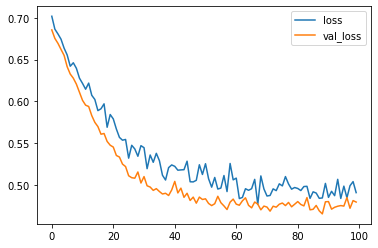

In [37]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


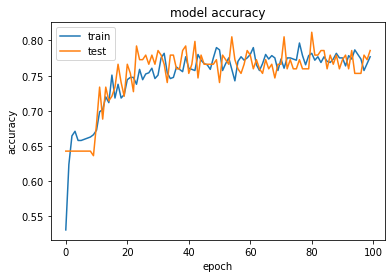

In [42]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()